In [1]:
"""
Model assumptions and parameters

Stages (index : name)
0 : Eggs
1 : Tadpoles (Larva)
2 : Froglets
3 : Young Adults
4 : Mature Adults

Per-stage parameters (F = fertility, S = survival to next stage, Initial = starting count)
- 0 (Eggs)           : F = 0,  S = 0.2, Initial = 100
- 1 (Tadpoles)       : F = 0,  S = 0.4, Initial = 50
- 2 (Froglets)       : F = 0,  S = 0.6, Initial = 25
- 3 (Young Adults)   : F = 5,  S = 0.8, Initial = 10
- 4 (Mature Adults)  : F = 10, S = 0.0, Initial = 5  (dies after reproduction)

Key assumptions / notes
- Only stages 3 and 4 reproduce (their fertility values appear in the first row of the Leslie/transition matrix).
- Survival values represent the probability of surviving from stage i to stage i+1 in one time step (year).
- Stage 4 (index 4) does not survive to a next stage (S = 0) — individuals die after reproduction.
- The transition matrix A should have fertilities in row 0 and survivals on the subdiagonal.
- Initial population vector ordering: [Eggs, Tadpoles, Froglets, Young Adults, Mature Adults].
- Time step = 1 year.
"""

'\nModel assumptions and parameters\n\nStages (index : name)\n0 : Eggs\n1 : Tadpoles (Larva)\n2 : Froglets\n3 : Young Adults\n4 : Mature Adults\n\nPer-stage parameters (F = fertility, S = survival to next stage, Initial = starting count)\n- 0 (Eggs)           : F = 0,  S = 0.2, Initial = 100\n- 1 (Tadpoles)       : F = 0,  S = 0.4, Initial = 50\n- 2 (Froglets)       : F = 0,  S = 0.6, Initial = 25\n- 3 (Young Adults)   : F = 5,  S = 0.8, Initial = 10\n- 4 (Mature Adults)  : F = 10, S = 0.0, Initial = 5  (dies after reproduction)\n\nKey assumptions / notes\n- Only stages 3 and 4 reproduce (their fertility values appear in the first row of the Leslie/transition matrix).\n- Survival values represent the probability of surviving from stage i to stage i+1 in one time step (year).\n- Stage 4 (index 4) does not survive to a next stage (S = 0) — individuals die after reproduction.\n- The transition matrix A should have fertilities in row 0 and survivals on the subdiagonal.\n- Initial populatio

In [2]:
import numpy as np
import matplotlib.pyplot as plt

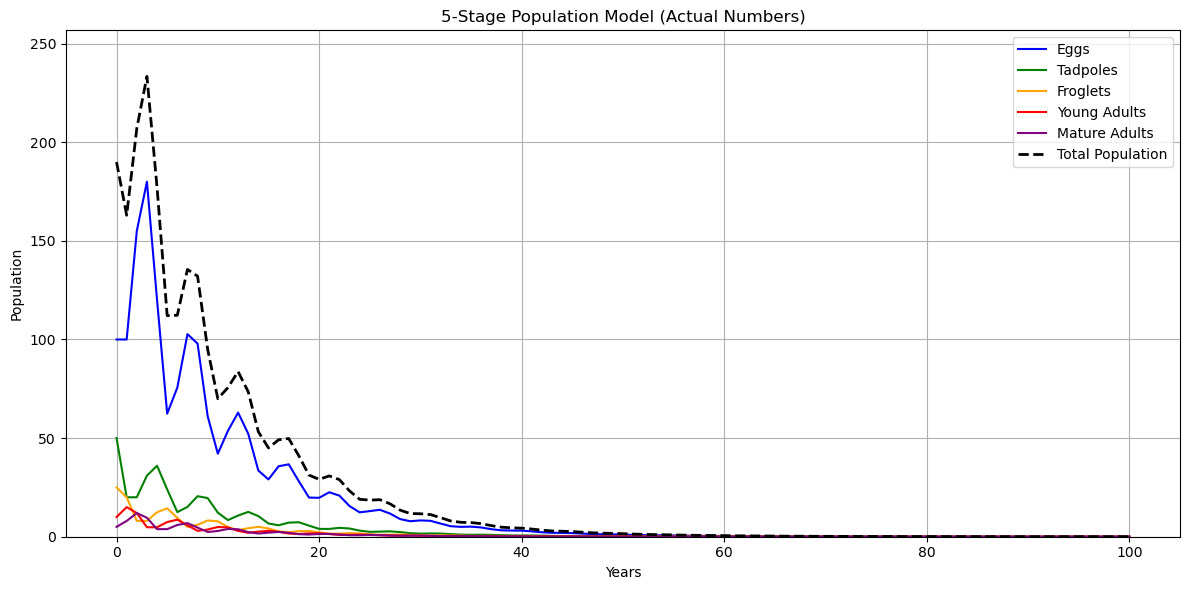

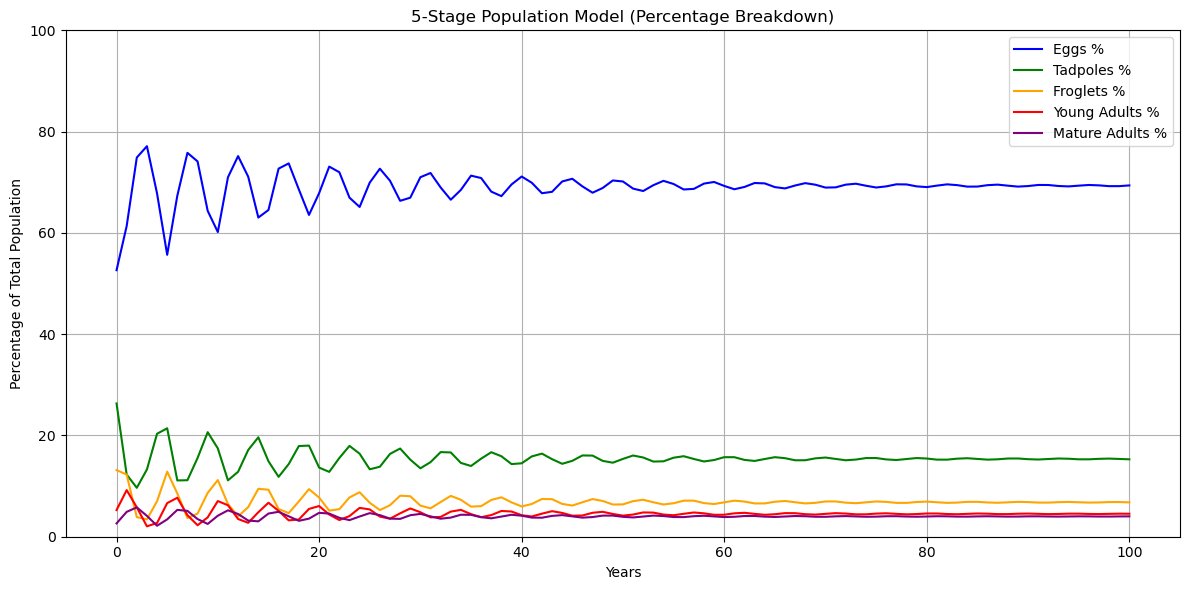

In [3]:
def stage_population(years, initial_population_vector):
    A = np.array([
        [0,   0,   0,   5,  10],   # Fertility
        [0.2, 0,   0,   0,   0],   # Survival from 0→1
        [0,  0.4,  0,   0,   0],   # Survival from 1→2
        [0,   0, 0.6,   0,   0],   # Survival from 2→3
        [0,   0,   0, 0.8,   0],   # Survival from 3→4
    ], dtype=float)

    n_t = np.array(initial_population_vector, dtype=float)
    num_stages = A.shape[0]

    # Tracking population for each stage
    stage_populations = [[] for _ in range(num_stages)]
    total_population = []
    stage_percentages = [[] for _ in range(num_stages)]

    # Initial values
    for i in range(num_stages):
        stage_populations[i].append(n_t[i])
    total_population.append(n_t.sum())
    for i in range(num_stages):
        stage_percentages[i].append(100 * n_t[i] / total_population[0] if total_population[0] > 0 else 0)

    # Simulation loop
    for year in range(years):
        n_t = np.dot(A, n_t)
        total = n_t.sum()
        for i in range(num_stages):
            stage_populations[i].append(n_t[i])
            stage_percentages[i].append(100 * n_t[i] / total if total > 0 else 0)
        total_population.append(total)

    return stage_populations, stage_percentages, total_population

# --- Parameters ---
years = 100
initial_population_vector = [100, 50, 25, 10, 5]  # Initial population for each stage

# --- Run Simulation ---
stage_pops, stage_percents, total_pop = stage_population(years, initial_population_vector)

# --- Graphing: Actual Population ---
x_vals = list(range(years + 1))
stage_labels = ['Eggs', 'Tadpoles', 'Froglets', 'Young Adults', 'Mature Adults']
colors = ['blue', 'green', 'orange', 'red', 'purple']

plt.figure(figsize=(12, 6))
plt.ylim(0, max(total_pop) * 1.1)

for i in range(5):
    plt.plot(x_vals, stage_pops[i], label=f'{stage_labels[i]}', color=colors[i])

plt.plot(x_vals, total_pop, label='Total Population', color='black', linewidth=2, linestyle='--')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('5-Stage Population Model (Actual Numbers)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Graphing: Percentage of Total ---
plt.figure(figsize=(12, 6))
plt.ylim(0, 100)

for i in range(5):
    plt.plot(x_vals, stage_percents[i], label=f'{stage_labels[i]} %', color=colors[i])

plt.xlabel('Years')
plt.ylabel('Percentage of Total Population')
plt.title('5-Stage Population Model (Percentage Breakdown)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# What was the real world example?
The model was based on a 5-stage life cycle of frogs. These stages align well with age-structured Leslie matrix models, which use F (fertility) and S (survival) values. The model simulates how individuals progress through life stages and how many offspring each stage contributes.

# What was the result of the 50 year model using your initial populations?
The total population declined over time and did not reach a growing trend.

# Describe what the transient and stable behavior of the model looked like.
Transient Behavior - early generations showed oscillations in age group sizes. Egg and tadpole numbers fluctuated due to the delayed impact of fertility (offspring only come from age classes 3 and 4)

Stable Behavior - The relative proportion of each age group became steady as time went on. This is because the total population size was decreasing toward extinction.

# Interesting Findings

Survival Rate of Eggs
* S < 0.32 = Population Decline
* S = 0.32 = Stable Population
* S > 0.32 = Population Growth

Survival Rate of Tadpoles
* S < 0.64 = Population Decline
* S = 0.64 = Stable Population
* S > 0.64 = Population Growth